# Moving Average

> with reference to EpiRHandbook Chapter 17

In [ ]:
#| default_exp moving

In [ ]:
#|hide
from nbdev import *
from fastcore.test import *
from fastcore.utils import *

In [ ]:
#|export
import pandas as pd
import numpy as np
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell 
import matplotlib.pyplot as plt
import matplotlib.style as style

#| export
def foo22(): pass

## Set up

To use colourbind colour schemes (optional).  To get the color, see https://github.com/matplotlib/matplotlib/blob/main/lib/matplotlib/mpl-data/stylelib/tableau-colorblind10.mplstyle

In [ ]:
style.use('tableau-colorblind10')

Display multiple outputs from a single kernel

In [ ]:
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
pd.set_option('display.max_columns', 100)  # set display options in pandas
pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)

Installation of Jupyter notebook extension is required for pandas_profiling.  Also need to run  

## Data

Import data from https://github.com/appliedepi/epiRhandbook_eng/blob/master/data/linelist_cleaned.xlsx and then save under "epiRhandbook_data" folder.  
Note: Installation of "openpyxl" is required.

In [ ]:
linelist = pd.read_excel('epiRhandbook_data/linelist_cleaned.xlsx')

In [ ]:
No_of_line_display = 5
linelist.head(No_of_line_display)

,case_id,generation,date_infection,date_onset,date_hospitalisation,date_outcome,outcome,gender,age,age_unit,age_years,age_cat,age_cat5,hospital,lon,lat,infector,source,wt_kg,ht_cm,ct_blood,fever,chills,cough,aches,vomit,temp,time_admission,bmi,days_onset_hosp
0,5fe599,4,2014-05-08,2014-05-13,2014-05-15,NaT,NaN,m,2.0,years,2.0,0-4,0-4,Other,-13.215735,8.468973,f547d6,other,27,48,22,no,no,yes,no,yes,36.8,NaN,117.187500,2.0
1,8689b7,4,NaT,2014-05-13,2014-05-14,2014-05-18,Recover,f,3.0,years,3.0,0-4,0-4,Missing,-13.215234,8.451719,NaN,NaN,25,59,22,NaN,NaN,NaN,NaN,NaN,36.9,09:36,71.818443,1.0
2,11f8ea,2,NaT,2014-05-16,2014-05-18,2014-05-30,Recover,m,56.0,years,56.0,50-69,55-59,St. Mark's Maternity Hospital (SMMH),-13.212911,8.464817,NaN,NaN,91,238,21,NaN,NaN,NaN,NaN,NaN,36.9,16:48,16.065250,2.0
3,b8812a,3,2014-05-04,2014-05-18,2014-05-20,NaT,NaN,f,18.0,years,18.0,15-19,15-19,Port Hospital,-13.236371,8.475476,f90f5f,other,41,135,23,no,no,no,no,no,36.8,11:22,22.496571,2.0
4,893f25,3,2014-05-18,2014-05-21,2014-05-22,2014-05-29,Recover,m,3.0,years,3.0,0-4,0-4,Military Hospital,-13.222864,8.460824,11f8ea,other,36,71,23,no,no,yes,no,yes,36.9,12:60,71.414402,1.0


### Browse data

In [ ]:
df_date_hosp = pd.DataFrame(list(zip(linelist['date_hospitalisation'], linelist['case_id'])), columns=['date_hospitalisation', 'case_id'])
df_date_hosp

,date_hospitalisation,case_id
0,2014-05-15,5fe599
1,2014-05-14,8689b7
2,2014-05-18,11f8ea
3,2014-05-20,b8812a
4,2014-05-22,893f25
...,...,...
5883,2015-04-22,76d8fe
5884,2015-04-24,dd6664
5885,2015-04-25,635ef3
5886,2015-04-26,4b859a


In [ ]:
df_case_cnt = df_date_hosp.groupby('date_hospitalisation').count()
df_case_cnt = df_case_cnt.rename(columns={'case_id': 'new_cases'})
df_case_cnt

,new_cases
date_hospitalisation,
2014-04-17,1
2014-04-20,1
2014-04-25,1
2014-04-27,1
2014-04-29,1
...,...
2015-04-26,9
2015-04-27,6
2015-04-28,8


### window is the ROW and 6 prior ROWS

In [ ]:
df_case_cnt['reg_7day'] = df_case_cnt['new_cases'].rolling(7).sum()
df_case_cnt.head(20)

,new_cases,reg_7day
date_hospitalisation,,
2014-04-17,1,NaN
2014-04-20,1,NaN
2014-04-25,1,NaN
2014-04-27,1,NaN
2014-04-29,1,NaN
2014-05-02,1,NaN
2014-05-04,1,7.0
2014-05-05,1,7.0
2014-05-06,2,8.0


## window is the Day and 6 prior days

In [ ]:
df_case_cnt['indexed_7day'] = df_case_cnt['new_cases'].rolling('7D').sum()
df_case_cnt.head(20)

,new_cases,reg_7day,indexed_7day
date_hospitalisation,,,
2014-04-17,1,NaN,1.0
2014-04-20,1,NaN,2.0
2014-04-25,1,NaN,2.0
2014-04-27,1,NaN,2.0
2014-04-29,1,NaN,3.0
2014-05-02,1,NaN,3.0
2014-05-04,1,7.0,3.0
2014-05-05,1,7.0,4.0
2014-05-06,2,8.0,5.0


<AxesSubplot: xlabel='date_hospitalisation'>

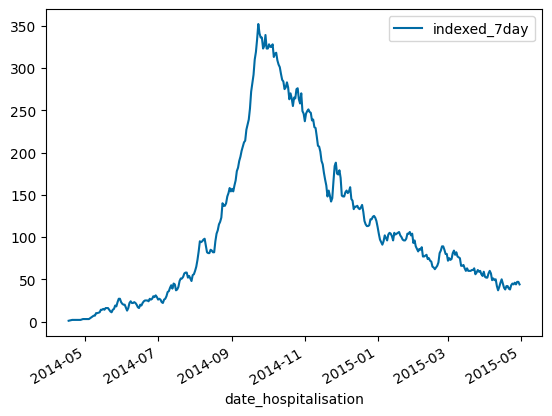

In [ ]:
df_case_cnt.plot(y='indexed_7day')

## Rolling by group

In [ ]:
df_grouped_roll = pd.DataFrame(list(zip(linelist['hospital'], linelist['date_hospitalisation'], linelist['case_id'])), columns=['hospital','date_hospitalisation', 'case_id'])
df_grouped_roll

,hospital,date_hospitalisation,case_id
0,Other,2014-05-15,5fe599
1,Missing,2014-05-14,8689b7
2,St. Mark's Maternity Hospital (SMMH),2014-05-18,11f8ea
3,Port Hospital,2014-05-20,b8812a
4,Military Hospital,2014-05-22,893f25
...,...,...,...
5883,Military Hospital,2015-04-22,76d8fe
5884,Port Hospital,2015-04-24,dd6664
5885,Missing,2015-04-25,635ef3
5886,Port Hospital,2015-04-26,4b859a


In [ ]:
df_grouped_roll['hospital'].unique()

array(['Other', 'Missing', "St. Mark's Maternity Hospital (SMMH)",
       'Port Hospital', 'Military Hospital', 'Central Hospital'],
      dtype=object)

In [ ]:
df_grouped_roll_CH = df_grouped_roll.query('hospital=="Central Hospital"')
df_grouped_roll_CH = df_grouped_roll_CH.groupby('date_hospitalisation').count()
df_grouped_roll_CH = df_grouped_roll_CH.rename(columns={'case_id': 'new_cases'})
df_grouped_roll_CH['indexed_7day'] = df_grouped_roll_CH['new_cases'].rolling('7D').mean()
df_grouped_roll_CH.drop('hospital', axis=1, inplace=True)
df_grouped_roll_CH

,new_cases,indexed_7day
date_hospitalisation,,
2014-05-06,1,1.000000
2014-05-10,1,1.000000
2014-05-13,1,1.000000
2014-05-28,2,2.000000
2014-06-06,1,1.000000
...,...,...
2015-04-21,1,1.333333
2015-04-22,1,1.250000
2015-04-23,1,1.200000


In [ ]:
def groupby_hosp_7mean(df, hosp_name):
    df = df.query(f'hospital=="{hosp_name}"')  ## important to have the double quote outside the input variable 
    df = df.groupby('date_hospitalisation').count()
    df = df.rename(columns={'case_id': 'new_cases'})
    df['indexed_7day'] = df['new_cases'].rolling('7D').mean()
    df.drop('hospital', axis=1, inplace=True)
    return df

In [ ]:
hosp_name="Central Hospital"

In [ ]:
groupby_hosp_7mean(df_grouped_roll, "Central Hospital")

,new_cases,indexed_7day
date_hospitalisation,,
2014-05-06,1,1.000000
2014-05-10,1,1.000000
2014-05-13,1,1.000000
2014-05-28,2,2.000000
2014-06-06,1,1.000000
...,...,...
2015-04-21,1,1.333333
2015-04-22,1,1.250000
2015-04-23,1,1.200000


In [ ]:
df_grouped_roll_s = df_grouped_roll.groupby(['hospital', 'date_hospitalisation']).count()
df_grouped_roll_s = df_grouped_roll_s.rename(columns={'case_id': 'new_cases'})
df_grouped_roll_s

new_cases
hospital                             date_hospitalisation           
Central Hospital                     2014-05-06                    1
                                     2014-05-10                    1
                                     2014-05-13                    1
                                     2014-05-28                    2
                                     2014-06-06                    1
...                                                              ...
St. Mark's Maternity Hospital (SMMH) 2015-04-15                    1
                                     2015-04-22                    1
                                     2015-04-24                    2
                                     2015-04-28                    1
                                     2015-04-29                    1

[1617 rows x 1 columns]

In [ ]:
df_grouped_roll_s['mean_7day_hosp'] = df_grouped_roll_s['new_cases'].rolling(7).mean()

In [ ]:
df_grouped_roll_s

new_cases  mean_7day_hosp
hospital                             date_hospitalisation                           
Central Hospital                     2014-05-06                    1             NaN
                                     2014-05-10                    1             NaN
                                     2014-05-13                    1             NaN
                                     2014-05-28                    2             NaN
                                     2014-06-06                    1             NaN
...                                                              ...             ...
St. Mark's Maternity Hospital (SMMH) 2015-04-15                    1        1.000000
                                     2015-04-22                    1        1.000000
                                     2015-04-24                    2        1.142857
                                     2015-04-28                    1        1.142857
                                     2015-04-29                    1        1.142857

[1617 rows x 2 columns]

<AxesSubplot: xlabel='hospital,date_hospitalisation'>

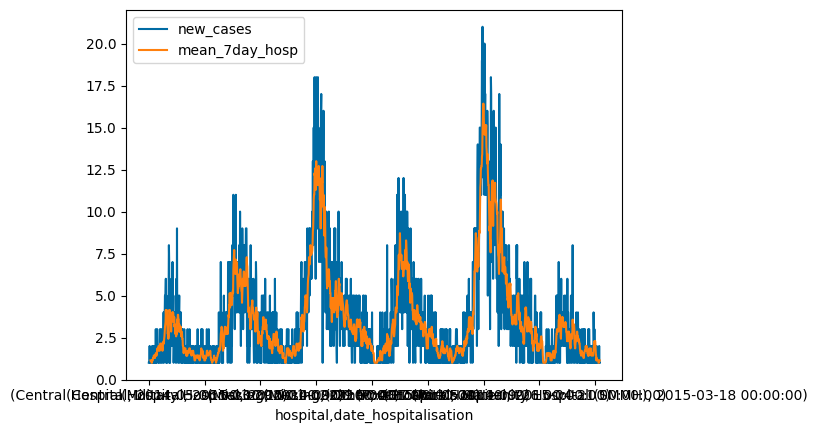

In [ ]:
df_grouped_roll_s.plot()

In [ ]:
#| hide
nbdev_export()